<a href="https://colab.research.google.com/github/CKrishnaGhrini/Project-Email-Classification/blob/main/Project_Email_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
from sklearn.svm import SVC


In [ ]:
spam=pd.read_csv('/content/spam.csv')



In [ ]:
spam.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
spam.isnull().sum()

,0
Category,0
Message,0


In [ ]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
spam.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


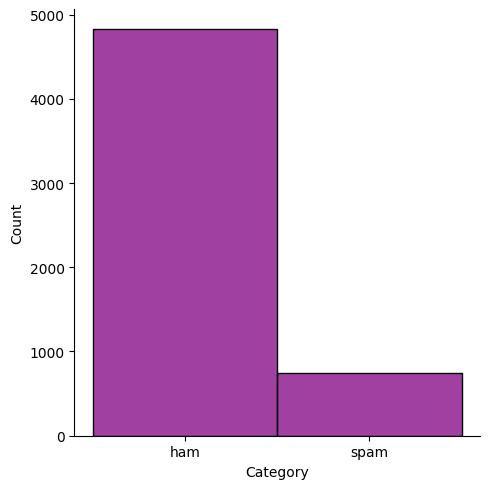

In [ ]:
sns.displot(x=spam['Category'],color='purple')
plt.show()

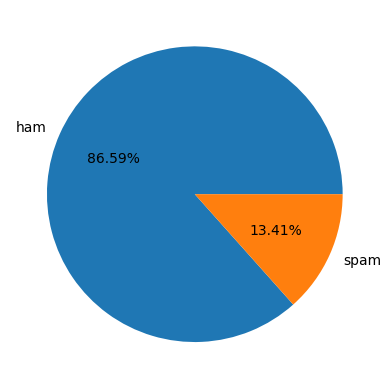

In [ ]:
plt.pie(spam['Category'].value_counts(),labels=['ham','spam'],autopct='%1.2f%%')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
spam['Message'] = label_encoder.fit_transform(spam['Message'] )


In [ ]:
X=spam[['Message']]
y=spam['Category']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [ ]:
print(f"the length of training dataset is {len(X_train)}")
print(f"the length of testing dataset is {len(X_test)}")

the length of training dataset is 4457
the length of testing dataset is 1115


In [ ]:
rf=RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred=rf.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pred))

0.8986547085201794


In [ ]:
print(confusion_matrix(y_test,y_pred))

[[905  61]
 [ 52  97]]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.95      0.94      0.94       966
        spam       0.61      0.65      0.63       149

    accuracy                           0.90      1115
   macro avg       0.78      0.79      0.79      1115
weighted avg       0.90      0.90      0.90      1115



In [ ]:
svm_model=SVC()

In [ ]:
svm_model.fit(X_train,y_train)

SVC()

In [ ]:
y_svm_pred=svm_model.predict(X_test)

In [ ]:
print(classification_report(y_test,y_svm_pred))

              precision    recall  f1-score   support

         ham       0.87      1.00      0.93       966
        spam       0.00      0.00      0.00       149

    accuracy                           0.87      1115
   macro avg       0.43      0.50      0.46      1115
weighted avg       0.75      0.87      0.80      1115



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(confusion_matrix(y_test,y_svm_pred))

[[966   0]
 [149   0]]


In [ ]:
rf_accuracy=accuracy_score(y_test,y_pred)
svm_accuracy=accuracy_score(y_test,y_svm_pred)

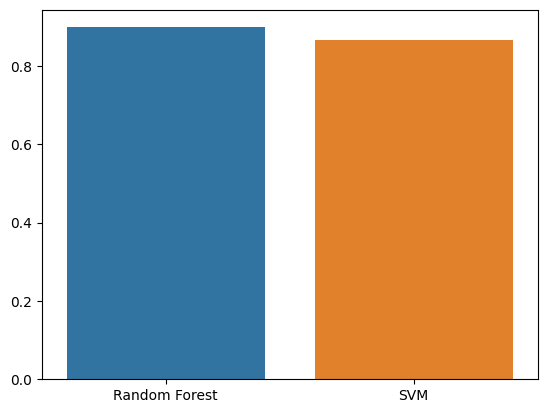

In [ ]:
sns.barplot(x=['Random Forest','SVM'],y=[rf_accuracy,svm_accuracy],hue=['Random Forest','SVM'])
plt.show()


In this project the model predicts whether a message is a spam or ham. I have used Random Forest and SVM in this project. I have achieved an accuracy of 0.87 using SVM and 0.90 using Random Forest



